# Lab 7-1: Tips
#### 정재현

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
# For reproducibility
torch.manual_seed(1)

## Training and Test Datasets

In [4]:
x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ])              # (m ,3)
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])   # (m, )

In [5]:
x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = torch.LongTensor([2, 2, 2])

## Model

In [23]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3)   # 3 => 3
    def forward(self, x):
        return self.linear(x)    # |x| = (m, 3) => (m' ,3)

In [24]:
model = SoftmaxClassifierModel()

In [25]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [26]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.cross_entropy(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [27]:
# Validation

def test(model, optimizer, x_test, y_test):
    prediction = model(x_test)
    predicted_classes = prediction.max(1)[1]
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)

    print('Accuracy: {}% Cost: {:.7f}'.format(
         correct_count / len(y_test) * 100, cost.item()
    ))

In [28]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 3.187324
Epoch    1/20 Cost: 1.334308
Epoch    2/20 Cost: 1.047911
Epoch    3/20 Cost: 0.996043
Epoch    4/20 Cost: 0.985740
Epoch    5/20 Cost: 0.977224
Epoch    6/20 Cost: 0.970065
Epoch    7/20 Cost: 0.963589
Epoch    8/20 Cost: 0.957562
Epoch    9/20 Cost: 0.951825
Epoch   10/20 Cost: 0.946302
Epoch   11/20 Cost: 0.940942
Epoch   12/20 Cost: 0.935719
Epoch   13/20 Cost: 0.930613
Epoch   14/20 Cost: 0.925613
Epoch   15/20 Cost: 0.920711
Epoch   16/20 Cost: 0.915902
Epoch   17/20 Cost: 0.911182
Epoch   18/20 Cost: 0.906547
Epoch   19/20 Cost: 0.901994


In [29]:
test(model, optimizer, x_test, y_test)

Accuracy: 33.33333333333333% Cost: 0.9442754


## Learning Rate

In [30]:
model = SoftmaxClassifierModel()

In [31]:
optimizer = optim.SGD(model.parameters(), lr=1e5)

In [32]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.341574
Epoch    1/20 Cost: 720868.875000
Epoch    2/20 Cost: 1323871.000000
Epoch    3/20 Cost: 1948224.250000
Epoch    4/20 Cost: 887933.500000
Epoch    5/20 Cost: 1134161.875000
Epoch    6/20 Cost: 1173993.750000
Epoch    7/20 Cost: 1576996.000000
Epoch    8/20 Cost: 1256036.875000
Epoch    9/20 Cost: 1141058.500000
Epoch   10/20 Cost: 691181.250000
Epoch   11/20 Cost: 1377912.000000
Epoch   12/20 Cost: 1830121.000000
Epoch   13/20 Cost: 563849.375000
Epoch   14/20 Cost: 1395108.500000
Epoch   15/20 Cost: 923993.750000
Epoch   16/20 Cost: 705254.312500
Epoch   17/20 Cost: 1287933.500000
Epoch   18/20 Cost: 914603.687500
Epoch   19/20 Cost: 886079.937500


learning rate이 너무 작으면 cost가 거의 줄어들지 않는다.

In [33]:
model = SoftmaxClassifierModel()

In [34]:
optimizer = optim.SGD(model.parameters(), lr=1e-10)

In [35]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 2.939317
Epoch    1/20 Cost: 2.939317
Epoch    2/20 Cost: 2.939317
Epoch    3/20 Cost: 2.939317
Epoch    4/20 Cost: 2.939317
Epoch    5/20 Cost: 2.939317
Epoch    6/20 Cost: 2.939317
Epoch    7/20 Cost: 2.939317
Epoch    8/20 Cost: 2.939317
Epoch    9/20 Cost: 2.939317
Epoch   10/20 Cost: 2.939317
Epoch   11/20 Cost: 2.939317
Epoch   12/20 Cost: 2.939317
Epoch   13/20 Cost: 2.939317
Epoch   14/20 Cost: 2.939317
Epoch   15/20 Cost: 2.939317
Epoch   16/20 Cost: 2.939317
Epoch   17/20 Cost: 2.939317
Epoch   18/20 Cost: 2.939317
Epoch   19/20 Cost: 2.939317


적절한 숫자로 시작해 발산하면 작게, cost가 줄어들지 않으면 크게 조정하자.

In [36]:
model = SoftmaxClassifierModel()

In [37]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [38]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 2.382223
Epoch    1/20 Cost: 1.049989
Epoch    2/20 Cost: 1.004628
Epoch    3/20 Cost: 0.997236
Epoch    4/20 Cost: 0.990571
Epoch    5/20 Cost: 0.984154
Epoch    6/20 Cost: 0.977902
Epoch    7/20 Cost: 0.971787
Epoch    8/20 Cost: 0.965791
Epoch    9/20 Cost: 0.959904
Epoch   10/20 Cost: 0.954120
Epoch   11/20 Cost: 0.948436
Epoch   12/20 Cost: 0.942850
Epoch   13/20 Cost: 0.937359
Epoch   14/20 Cost: 0.931961
Epoch   15/20 Cost: 0.926654
Epoch   16/20 Cost: 0.921437
Epoch   17/20 Cost: 0.916309
Epoch   18/20 Cost: 0.911268
Epoch   19/20 Cost: 0.906312


## Data Preprocessing (데이터 전처리)

In [39]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

$$ x'_j = \frac{x_j - \mu_j}{\sigma_j} $$

In [40]:
mu = x_train.mean(dim=0)

In [41]:
sigma = x_train.std(dim=0)

In [42]:
norm_x_train = (x_train - mu) / sigma

In [43]:
print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


In [44]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [45]:
model = MultivariateLinearRegressionModel()

In [46]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [47]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [48]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0/20 Cost: 29600.306641
Epoch    1/20 Cost: 18804.240234
Epoch    2/20 Cost: 11994.162109
Epoch    3/20 Cost: 7664.638184
Epoch    4/20 Cost: 4902.157227
Epoch    5/20 Cost: 3136.613525
Epoch    6/20 Cost: 2007.371338
Epoch    7/20 Cost: 1284.856445
Epoch    8/20 Cost: 822.500793
Epoch    9/20 Cost: 526.603455
Epoch   10/20 Cost: 337.227966
Epoch   11/20 Cost: 216.023148
Epoch   12/20 Cost: 138.446274
Epoch   13/20 Cost: 88.791290
Epoch   14/20 Cost: 57.006721
Epoch   15/20 Cost: 36.659050
Epoch   16/20 Cost: 23.631582
Epoch   17/20 Cost: 15.289035
Epoch   18/20 Cost: 9.944975
Epoch   19/20 Cost: 6.520218


## Overfitting

In [ ]:
def train_with_regularization(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # l2 norm 계산
        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param)
            
        cost += l2_reg

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch+1, nb_epochs, cost.item()
        ))

In [ ]:
model = MultivariateLinearRegressionModel()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [ ]:
train_with_regularization(model, optimizer, norm_x_train, y_train)

Epoch    1/20 Cost: 29477.810547
Epoch    2/20 Cost: 18798.513672
Epoch    3/20 Cost: 12059.364258
Epoch    4/20 Cost: 7773.400879
Epoch    5/20 Cost: 5038.263672
Epoch    6/20 Cost: 3290.066406
Epoch    7/20 Cost: 2171.882568
Epoch    8/20 Cost: 1456.434570
Epoch    9/20 Cost: 998.598267
Epoch   10/20 Cost: 705.595398
Epoch   11/20 Cost: 518.073608
Epoch   12/20 Cost: 398.057220
Epoch   13/20 Cost: 321.242920
Epoch   14/20 Cost: 272.078247
Epoch   15/20 Cost: 240.609131
Epoch   16/20 Cost: 220.465637
Epoch   17/20 Cost: 207.570602
Epoch   18/20 Cost: 199.314804
Epoch   19/20 Cost: 194.028214
Epoch   20/20 Cost: 190.642014


# Lab 7-2 MNIST Learning rate and Evaluation

In [49]:
import torch
import torchvision.datasets as dsets      # torchvision은 다양한 데이터셋, 모델, 전처리 기능등을 가지고 있는 패키지이다
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [50]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [51]:
# parameters
training_epochs = 15
batch_size = 100

In [52]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [53]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [54]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)  # 28 * 28, 0~9까지 수 10개

In [55]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [56]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)  # 크로스 엔트로피 계산
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577745
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404700
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456524
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074089
Epoch: 0010 cost = 0.284515589
Epoch: 0011 cost = 0.281914085
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422735
Learning finished


Accuracy: 0.8883000016212463
Label:  8
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


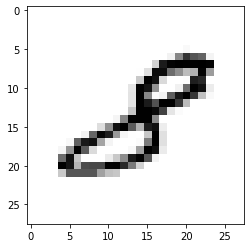

In [57]:
# Test the model using test sets
with torch.no_grad():    # gradient 계산 x
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()